# Using SBbadger to create benchmarking models

In [1]:
import SBbadger
SBbadger.__version__

'1.4.4'

In [2]:
from SBbadger import generate
import os
import numpy as np
import tellurium as te
import teUtils as tu
import csv
import re
from tqdm import tqdm

In [13]:
N_SPECIES = 10
NOTE = 'w-Allo'

GENERATED_MODEL_PATH = 'mass_action/'
sbmlN = 2

In [17]:
if NOTE:
    FOLDER_NAME = f'{N_SPECIES}sp_{NOTE}/'
else: 
    FOLDER_NAME = f'{N_SPECIES}sp/'
FOLDER_NAME

'10sp_w-Allo/'

In [5]:
# delete
r = te.loada('models/mass_action/antimony/mass_action_1.ant')
a = r.getGlobalParameterIds()

## Filtering the synthetic models for "realisticness"

Here, we are making a list of sbml models that pass our checks for "realistic-ness", which are
- the magnitude of all floating species concentrations are under 100
- the magnitude of all reaction rates are under 100
- the magnitude of all flux control coefficients are under 10

Of course, these figures are arbitrary, but a good start for avoiding extremes, considering that there are only 75 species in this model. 

In [6]:
UPPER_FLOATING_SPECIES_CONCENTRATION_CUTOFF = 10
LOWER_FLOATING_SPECIES_CONCENTRATION_CUTOFF = 1e-3
REACTION_RATE_CUTOFF = 10
FCC_CUTOFF = 10

In [10]:
sbmlPath = './models/' + GENERATED_MODEL_PATH + 'sbml/'
with open('passlist.txt', 'w') as f:  # Use file to refer to the file object
    for sbml in tqdm(os.listdir(sbmlPath)):
        try: 
            r = te.loads(sbmlPath + sbml)
            r.reset()
            r.conservedMoietyAnalysis = True
            r.simulate(0,1000000)
            ss = r.steadyState()
            
            if len([i for i in r.getReactionIds() if 'EX_' in i])!=3:
                pass
            elif len([i for i in r.getGlobalParameterIds() if 'ro' in i])==0:
                pass
            elif np.all(np.absolute(r.getFloatingSpeciesConcentrations() < UPPER_FLOATING_SPECIES_CONCENTRATION_CUTOFF)):
                if np.all(np.absolute(r.getFloatingSpeciesConcentrations() > LOWER_FLOATING_SPECIES_CONCENTRATION_CUTOFF)):
                    if np.all(np.absolute(r.getReactionRates() < REACTION_RATE_CUTOFF)):
                        if np.all(np.absolute(r.getScaledFluxControlCoefficientMatrix()[0] < FCC_CUTOFF)):
                            f.write(re.split(r'[_|.]', sbml)[sbmlN]+'\n')
            
        except:
            pass# print('FAIL:', sbml)

100%|██████████| 993/993 [01:43<00:00,  9.60it/s]


## Moving the filter-approved files into a saved folder

In [11]:
import shutil
os.getcwd()

'c:\\Users\\user\\Documents\\research\\benchmarking'

In [12]:
folder_types = ['sbml', 'antimony', 'net_figs']

# create a new folder called FOLDER_NAME
os.mkdir('./' + FOLDER_NAME)

# create antimony, netfigs, sbml folders
for type in folder_types: 
    os.mkdir('./' + FOLDER_NAME + f'{type}')


In [16]:
GENERATED_MODEL_PATH


'10sp_w-Allo_srcsink/'

In [18]:
# go into models/test/antimony, netfigs, sbml
# copy all the files listed in passlist to relevent folders in FOLDER_NAME
def copyPassed(passlist, folder_type, ext, file_type=None):
    if file_type: 
        # passed = [f'{GENERATED_MODEL_PATH}_{file_type}_'+N+f'.{ext}' for N in passlist]
        passed = [f'{file_type}_'+N+f'.{ext}' for N in passlist]
    else: 
        passed = [f'{GENERATED_MODEL_PATH}_'+N+f'.{ext}' for N in passlist]

    for p in passed: 
        sourcePath = './models/' + GENERATED_MODEL_PATH + f'{folder_type}/' + p
        destPath = './'+ FOLDER_NAME + f'{folder_type}/'+ p
        shutil.copy(sourcePath, destPath)

with open("passlist.txt") as file:
    passlist = [line.rstrip() for line in file]
 
copyPassed(passlist, 'sbml', 'xml', file_type='mass_action')
copyPassed(passlist, 'antimony', 'ant', file_type='mass_action')
copyPassed(passlist, 'net_figs', 'png', file_type='mass_action_net_fig')

In [19]:
# move passlist to folder
shutil.move('passlist.txt', FOLDER_NAME + 'passlist.txt')

'10sp_w-Allo/passlist.txt'

## Plotting the passlist

In [20]:
ssPath = './' + FOLDER_NAME + 'ss_figs/'
os.mkdir(ssPath)

saved plot to ./10sp_w-Allo/ss_figs/ss_132.png


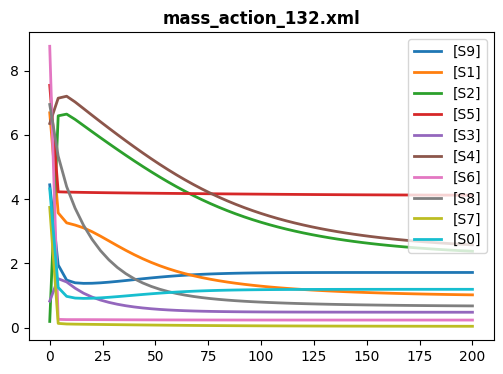

saved plot to ./10sp_w-Allo/ss_figs/ss_153.png


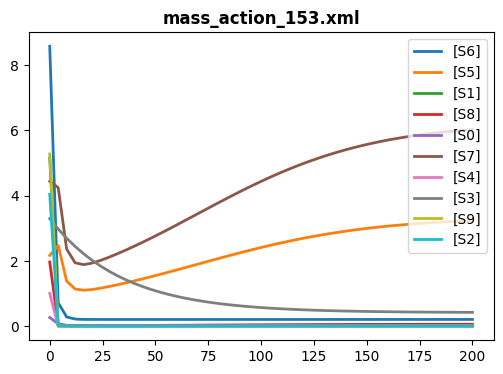

saved plot to ./10sp_w-Allo/ss_figs/ss_154.png


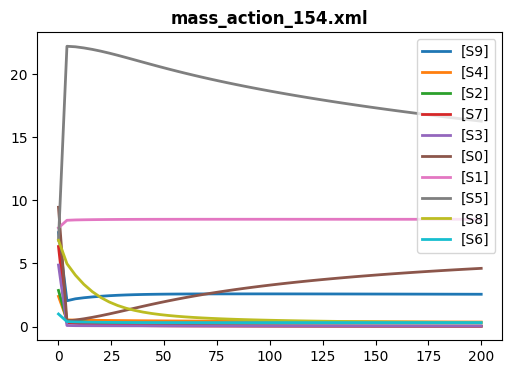

saved plot to ./10sp_w-Allo/ss_figs/ss_18.png


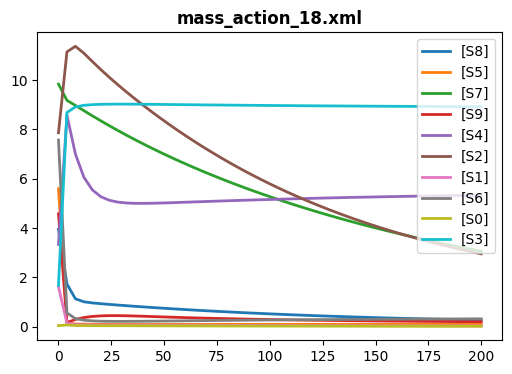

saved plot to ./10sp_w-Allo/ss_figs/ss_312.png


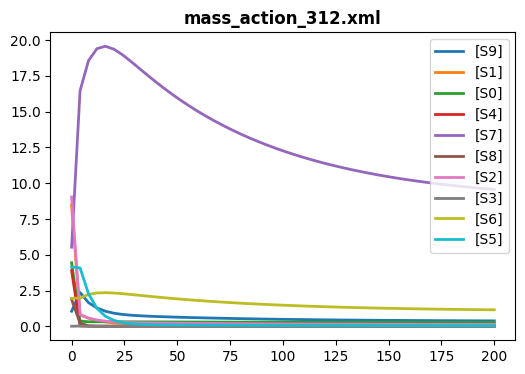

saved plot to ./10sp_w-Allo/ss_figs/ss_43.png


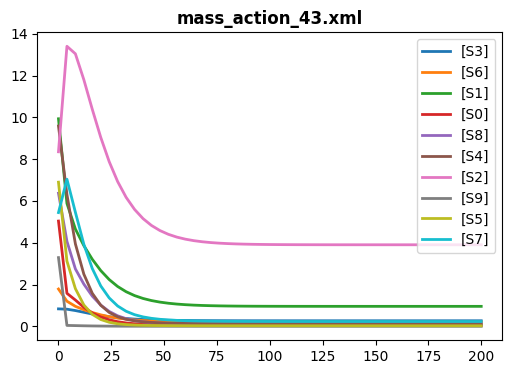

saved plot to ./10sp_w-Allo/ss_figs/ss_437.png


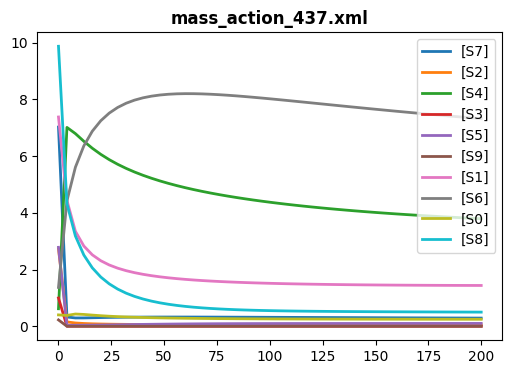

saved plot to ./10sp_w-Allo/ss_figs/ss_471.png


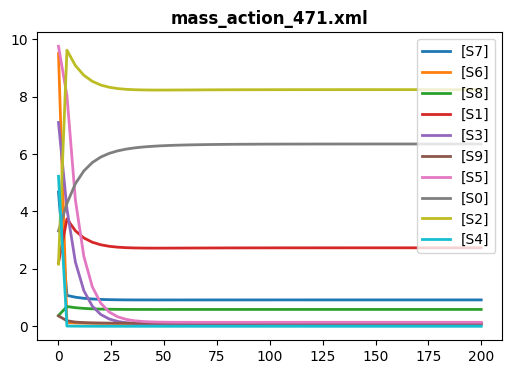

saved plot to ./10sp_w-Allo/ss_figs/ss_509.png


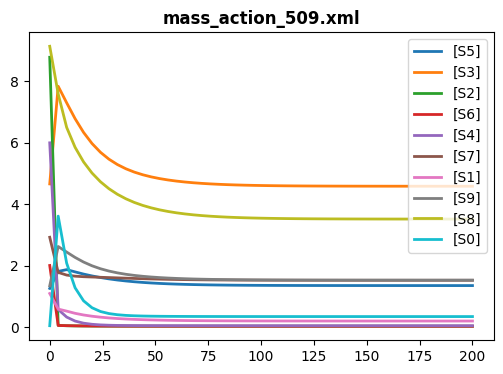

saved plot to ./10sp_w-Allo/ss_figs/ss_544.png


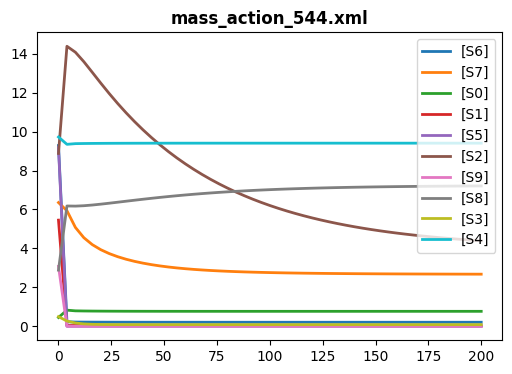

saved plot to ./10sp_w-Allo/ss_figs/ss_638.png


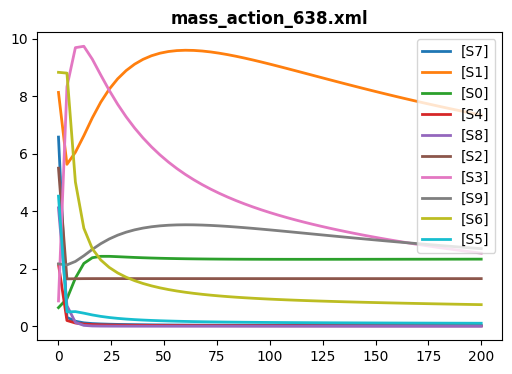

saved plot to ./10sp_w-Allo/ss_figs/ss_725.png


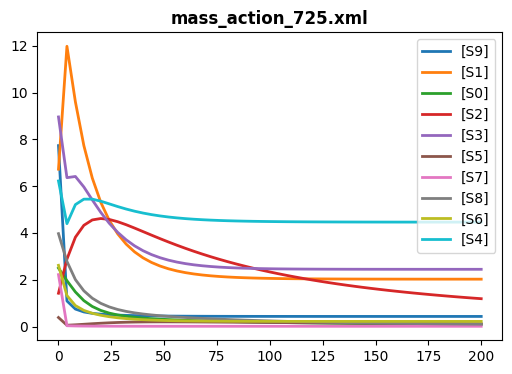

saved plot to ./10sp_w-Allo/ss_figs/ss_771.png


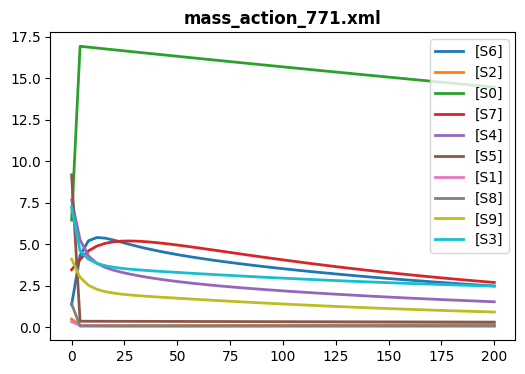

saved plot to ./10sp_w-Allo/ss_figs/ss_805.png


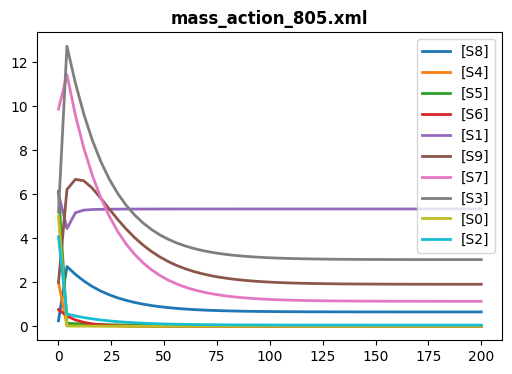

saved plot to ./10sp_w-Allo/ss_figs/ss_832.png


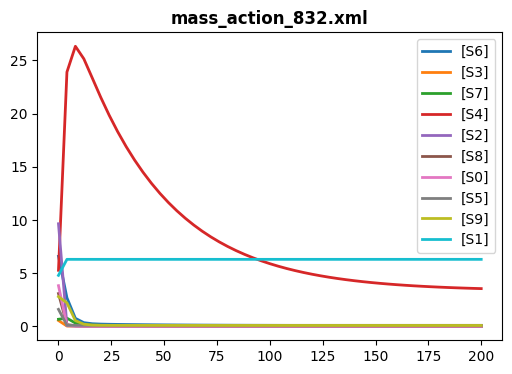

saved plot to ./10sp_w-Allo/ss_figs/ss_941.png


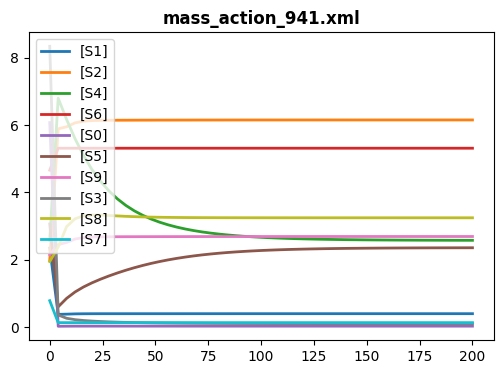

saved plot to ./10sp_w-Allo/ss_figs/ss_947.png


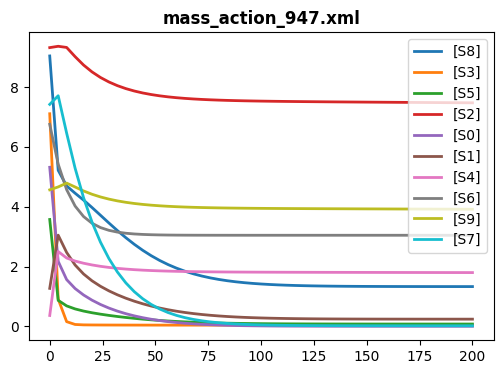

In [24]:
for i,file in enumerate(os.listdir('./'+ FOLDER_NAME + 'sbml/')):   
    r = te.loads(sbmlPath + file)
    r.reset()
    r.conservedMoietyAnalysis = True
    r.simulate(0,200)
    r.plot(title=file, savefig=ssPath+f'ss_{passlist[i]}.png')
